In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('thyroid.csv')
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative


In [3]:
data.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,2
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,negative
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3541


In [4]:
data['TBG'].unique()

array(['?'], dtype=object)

### Data cleaning

Data cleaning is simply the process of preparing your data the best way possible for the model to learn accurately and effectively from it. Data cleaning takes a lot of patience and time; it is also an essential step to building a good model which makes it worth the while. 

In [3]:
data['age'] = data['age'].replace('?', np.nan)

In [4]:
data['age'].dropna(inplace = True)
data['age'] = data.age.astype(str).astype(int)

In [5]:
data['age'].isnull().sum()

1

In [7]:
data['age'] = data['age'].dropna()

In [8]:
data['age'].isnull().sum()

1

In [5]:
data.describe()

,age
count,3771.000000
mean,51.735879
std,20.084958
min,1.000000
25%,36.000000
50%,54.000000
75%,67.000000
max,455.000000


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
age                          3771 non-null float64
sex                          3772 non-null object
on_thyroxine                 3772 non-null object
query_on_thyroxine           3772 non-null object
on_antithyroid_medication    3772 non-null object
sick                         3772 non-null object
pregnant                     3772 non-null object
thyroid_surgery              3772 non-null object
I131_treatment               3772 non-null object
query_hypothyroid            3772 non-null object
query_hyperthyroid           3772 non-null object
lithium                      3772 non-null object
goitre                       3772 non-null object
tumor                        3772 non-null object
hypopituitary                3772 non-null object
psych                        3772 non-null object
TSH_measured                 3772 non-null object
TSH                          3772 non-null

In [9]:
data['sex'] = data.sex.astype('category')
data['on_thyoxine'] = data.on_thyroxine.astype('category')
data['on_antithyroid_medication'] = data.on_antithyroid_medication.astype('category')
data['sick'] = data.sick.astype('category')
data['pregnant'] = data.pregnant.astype('category')
data['thyroid_surgery'] = data.thyroid_surgery.astype('category')
data['query_hypothyroid'] = data.query_hypothyroid.astype('category')
data['query_hyperthyroid'] = data.query_hyperthyroid.astype('category')
data['goitre'] = data.goitre.astype('category')
data['lithium'] = data.lithium.astype('category')
data['tumor'] = data.tumor.astype('category')
data['hypopituitary'] = data.hypopituitary.astype('category')
data['psych'] = data.psych.astype('category')
data['Class'] = data.Class.astype('category')

In [10]:
data['sick'] = data.sick.cat.codes

In [11]:
data['sex'] = data.sex.astype('category')
data['sex'] = data.sex.cat.codes

In [12]:
#data['on_thyoxine'] = data.on_thyroxine.cat.codes
#data['on_antithyroid_medication'] = data.on_antithyroid_medication.cat.codes
data['pregnant'] = data.pregnant.cat.codes
data['thyroid_surgery'] = data.thyroid_surgery.cat.codes
data['query_hypothyroid'] = data.query_hypothyroid.cat.codes
data['query_hyperthyroid'] = data.query_hyperthyroid.cat.codes
data['goitre'] = data.goitre.cat.codes
data['lithium'] = data.lithium.cat.codes
data['tumor'] = data.tumor.cat.codes
data['hypopituitary'] = data.hypopituitary.cat.codes
data['psych'] = data.psych.cat.codes

In [13]:
data['on_thyroxine'] = data.on_thyroxine.astype('category')

In [14]:
data['on_thyroxine'] = data.on_thyroxine.cat.codes

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 31 columns):
age                          3771 non-null float64
sex                          3772 non-null int8
on_thyroxine                 3772 non-null int8
query_on_thyroxine           3772 non-null object
on_antithyroid_medication    3772 non-null category
sick                         3772 non-null int8
pregnant                     3772 non-null int8
thyroid_surgery              3772 non-null int8
I131_treatment               3772 non-null object
query_hypothyroid            3772 non-null int8
query_hyperthyroid           3772 non-null int8
lithium                      3772 non-null int8
goitre                       3772 non-null int8
tumor                        3772 non-null int8
hypopituitary                3772 non-null int8
psych                        3772 non-null int8
TSH_measured                 3772 non-null object
TSH                          3772 non-null object
T3_measured   

In [16]:
df = data[['age', 'sex', 'on_thyroxine','on_antithyroid_medication', 'sick', 'pregnant',
         'lithium', 'goitre', 'tumor', 'thyroid_surgery', 'hypopituitary', 'psych', 'TSH', 'T3',
           'TT4', 'T4U', 'FTI', 'Class']]
df.head()

,age,sex,on_thyroxine,on_antithyroid_medication,sick,pregnant,lithium,goitre,tumor,thyroid_surgery,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class
0,41.0,1,0,f,0,0,0,0,0,0,0,0,1.3,2.5,125,1.14,109,negative
1,23.0,1,0,f,0,0,0,0,0,0,0,0,4.1,2,102,?,?,negative
2,46.0,2,0,f,0,0,0,0,0,0,0,0,0.98,?,109,0.91,120,negative
3,70.0,1,1,f,0,0,0,0,0,0,0,0,0.16,1.9,175,?,?,negative
4,70.0,1,0,f,0,0,0,0,0,0,0,0,0.72,1.2,61,0.87,70,negative


In [11]:
df = pd.get_dummies(df, columns = [ "sex", "on_thyroxine", "on_antithyroid_medication",
                               "sick", "pregnant", "thyroid_surgery", "goitre",
                              "lithium", "tumor", 'hypopituitary', 'psych'],
                             prefix = ["sex", "on_thyroxine", "on_antithyroid_medication",
                               "sick", "pregnant", "thyroid_surgery", "goitre",
                              "lithium", "tumor", 'hypopituitary', 'psych'])
df.head()

,age,TSH,T3,TT4,T4U,FTI,Class,sex_?,sex_F,sex_M,...,goitre_f,goitre_t,lithium_f,lithium_t,tumor_f,tumor_t,hypopituitary_f,hypopituitary_t,psych_f,psych_t
0,41.0,1.3,2.5,125,1.14,109,negative,0,1,0,...,1,0,1,0,1,0,1,0,1,0
1,23.0,4.1,2,102,?,?,negative,0,1,0,...,1,0,1,0,1,0,1,0,1,0
2,46.0,0.98,?,109,0.91,120,negative,0,0,1,...,1,0,1,0,1,0,1,0,1,0
3,70.0,0.16,1.9,175,?,?,negative,0,1,0,...,1,0,1,0,1,0,1,0,1,0
4,70.0,0.72,1.2,61,0.87,70,negative,0,1,0,...,1,0,1,0,1,0,1,0,1,0


In [12]:
df['Class'] = df['Class'].cat.codes

In [13]:
df = df.drop(['sex_?'], axis = 1)

In [14]:
df['TT4'].value_counts()

?      231
101     71
93      67
98      63
103     63
102     59
87      59
94      56
91      56
99      55
89      54
120     54
95      54
92      54
96      53
113     53
109     50
90      50
86      49
100     48
105     48
107     47
104     47
111     46
83      46
112     45
97      44
118     44
116     43
88      43
      ... 
257      1
246      1
220      1
240      1
255      1
4        1
272      1
237      1
219      1
273      1
211      1
24       1
186      1
207      1
21       1
2        1
47       1
206      1
49       1
43       1
239      1
6        1
301      1
29       1
226      1
40       1
4.8      1
258      1
16       1
253      1
Name: TT4, dtype: int64

In [15]:
df.corr()

,age,Class,sex_F,sex_M,on_thyroxine_f,on_thyroxine_t,on_antithyroid_medication_f,on_antithyroid_medication_t,sick_f,sick_t,...,goitre_f,goitre_t,lithium_f,lithium_t,tumor_f,tumor_t,hypopituitary_f,hypopituitary_t,psych_f,psych_t
age,1.000000,0.155010,0.010650,-0.000154,-0.014577,0.014577,0.063882,-0.063882,-0.079468,0.079468,...,0.051830,-0.051830,0.030126,-0.030126,0.025037,-0.025037,0.024927,-0.024927,0.100116,-0.100116
Class,0.155010,1.000000,-0.036993,0.045876,0.055261,-0.055261,0.027427,-0.027427,-0.091400,0.091400,...,0.000961,-0.000961,0.001642,-0.001642,0.027234,-0.027234,-0.063757,0.063757,0.021909,-0.021909
sex_F,0.010650,-0.036993,1.000000,-0.912956,-0.098534,0.098534,-0.035408,0.035408,0.001873,-0.001873,...,0.002094,-0.002094,-0.017554,0.017554,-0.077622,0.077622,0.022561,-0.022561,0.090708,-0.090708
sex_M,-0.000154,0.045876,-0.912956,1.000000,0.095709,-0.095709,0.027278,-0.027278,-0.007438,0.007438,...,-0.010417,0.010417,0.012138,-0.012138,0.073514,-0.073514,-0.024712,0.024712,-0.099896,0.099896
on_thyroxine_f,-0.014577,0.055261,-0.098534,0.095709,1.000000,-1.000000,-0.002201,0.002201,-0.042053,0.042053,...,-0.010098,0.010098,-0.002509,0.002509,-0.029773,0.029773,-0.006099,0.006099,-0.073571,0.073571
on_thyroxine_t,0.014577,-0.055261,0.098534,-0.095709,-1.000000,1.000000,0.002201,-0.002201,0.042053,-0.042053,...,0.010098,-0.010098,0.002509,-0.002509,0.029773,-0.029773,0.006099,-0.006099,0.073571,-0.073571
on_antithyroid_medication_f,0.063882,0.027427,-0.035408,0.027278,-0.002201,0.002201,1.000000,-1.000000,-0.021624,0.021624,...,-0.010241,0.010241,-0.007436,0.007436,-0.017353,0.017353,-0.001749,0.001749,-0.024318,0.024318
on_antithyroid_medication_t,-0.063882,-0.027427,0.035408,-0.027278,0.002201,-0.002201,-1.000000,1.000000,0.021624,-0.021624,...,0.010241,-0.010241,0.007436,-0.007436,0.017353,-0.017353,0.001749,-0.001749,0.024318,-0.024318
sick_f,-0.079468,-0.091400,0.001873,-0.007438,-0.042053,0.042053,-0.021624,0.021624,1.000000,-1.000000,...,-0.019205,0.019205,-0.013944,0.013944,0.010949,-0.010949,-0.003279,0.003279,-0.032883,0.032883
sick_t,0.079468,0.091400,-0.001873,0.007438,0.042053,-0.042053,0.021624,-0.021624,-1.000000,1.000000,...,0.019205,-0.019205,0.013944,-0.013944,-0.010949,0.010949,0.003279,-0.003279,0.032883,-0.032883


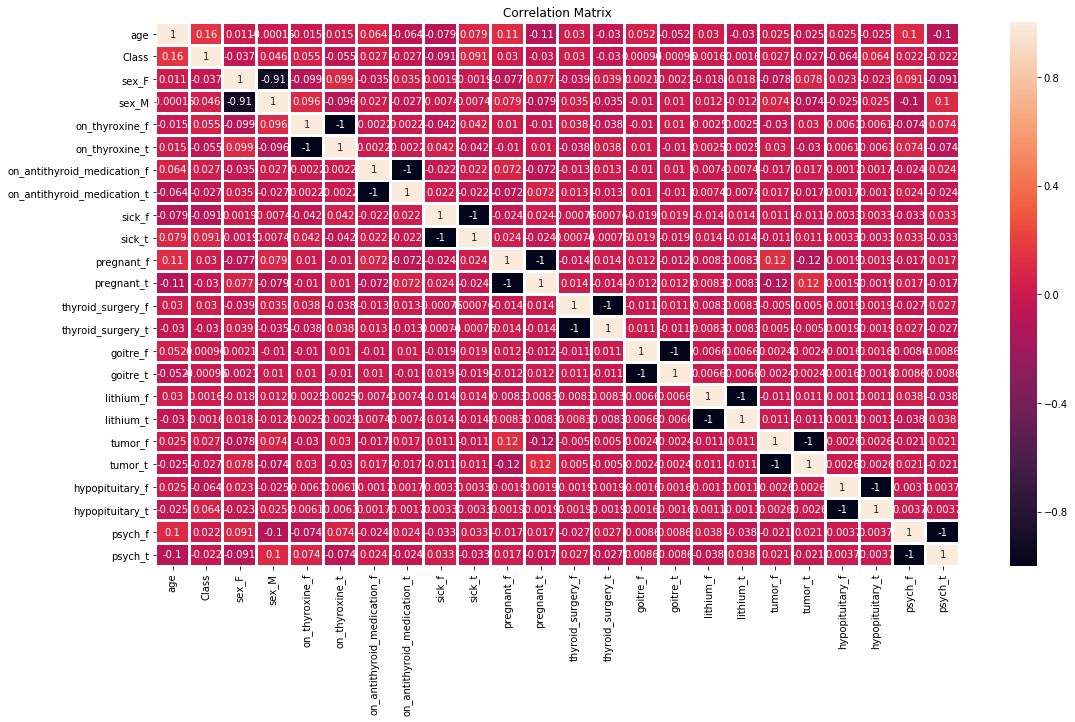

In [16]:
f, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(df.corr(),linewidths=2.0, ax= ax , annot=True)
ax.set_title('Correlation Matrix')
plt.savefig('first_correlation.png')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 29 columns):
age                            3771 non-null float64
TSH                            3772 non-null object
T3                             3772 non-null object
TT4                            3772 non-null object
T4U                            3772 non-null object
FTI                            3772 non-null object
Class                          3772 non-null int8
sex_F                          3772 non-null uint8
sex_M                          3772 non-null uint8
on_thyroxine_f                 3772 non-null uint8
on_thyroxine_t                 3772 non-null uint8
on_antithyroid_medication_f    3772 non-null uint8
on_antithyroid_medication_t    3772 non-null uint8
sick_f                         3772 non-null uint8
sick_t                         3772 non-null uint8
pregnant_f                     3772 non-null uint8
pregnant_t                     3772 non-null uint8
thyroid_surgery_f   

#### Replace missing values and convert object datatypes to numeric data types

In [18]:
df['TSH'] = df['TSH'].replace('?', np.nan)
df['TSH'] = df.TSH.astype(str).astype(float)
TSH_median = df['TSH'].median()
df['TSH'] = df['TSH'].replace(np.nan, TSH_median)

In [17]:
data['TSH'] = data['TSH'].replace('?', np.nan)
data['TSH'] = data.TSH.astype(str).astype(float)
TSH_median = data['TSH'].median()
data['TSH'] = data['TSH'].replace(np.nan, TSH_median)

In [19]:
df['T3'] = df['T3'].replace('?', np.nan)
df['T3'] = df.T3.astype(str).astype(float)
T3_median = df['T3'].median()
df['T3'] = df['T3'].replace(np.nan, T3_median)
df['T3'].isnull().sum()

0

In [18]:
data['T3'] = data['T3'].replace('?', np.nan)
data['T3'] = data.T3.astype(str).astype(float)
T3_median = data['T3'].median()
data['T3'] = data['T3'].replace(np.nan, T3_median)

In [20]:
df['TT4'] = df['TT4'].replace('?', np.nan)
df['TT4'] = df.TT4.astype(str).astype(float)
TT4_median = df['TT4'].median()
df['TT4'] = df['TT4'].replace(np.nan, TT4_median)
df['TT4'].isnull().sum()

0

In [19]:
data['TT4'] = data['TT4'].replace('?', np.nan)
data['TT4'] = data.TT4.astype(str).astype(float)
TT4_median = data['TT4'].median()
data['TT4'] = data['TT4'].replace(np.nan, TT4_median)
data['TT4'].isnull().sum()

0

In [21]:
df['T4U'] = df['T4U'].replace('?', np.nan)
df['T4U'] = df.T4U.astype(str).astype(float)
T4U_median = df['T4U'].median()
df['T4U'] = df['T4U'].replace(np.nan, T4U_median)
df['T4U'].isnull().sum()

0

In [20]:
data['T4U'] = data['T4U'].replace('?', np.nan)
data['T4U'] = data.T4U.astype(str).astype(float)
T4U_median = data['T4U'].median()
data['T4U'] = data['T4U'].replace(np.nan, T4U_median)
data['T4U'].isnull().sum()

0

In [22]:
df['FTI'] = df['FTI'].replace('?', np.nan)
df['FTI'] = df.FTI.astype(str).astype(float)
FTI_median = df['FTI'].median()
df['FTI'] = df['FTI'].replace(np.nan, FTI_median)
df['FTI'].isnull().sum()

0

In [21]:
data['FTI'] = data['FTI'].replace('?', np.nan)
data['FTI'] = data.FTI.astype(str).astype(float)
FTI_median = data['FTI'].median()
data['FTI'] = data['FTI'].replace(np.nan, FTI_median)
data['FTI'].isnull().sum()

0

In [32]:
data = data[['age', 'sex', 'on_thyroxine','on_antithyroid_medication', 'sick', 'pregnant',
         'lithium', 'goitre', 'tumor', 'thyroid_surgery', 'hypopituitary', 'psych', 'TSH', 'T3',
           'TT4', 'T4U', 'FTI', 'Class']]

In [33]:
data = data.dropna()

In [34]:
data.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
on_antithyroid_medication    0
sick                         0
pregnant                     0
lithium                      0
goitre                       0
tumor                        0
thyroid_surgery              0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
Class                        0
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3771 entries, 0 to 3771
Data columns (total 18 columns):
age                          3771 non-null float64
sex                          3771 non-null int8
on_thyroxine                 3771 non-null int8
on_antithyroid_medication    3771 non-null category
sick                         3771 non-null int8
pregnant                     3771 non-null int8
lithium                      3771 non-null int8
goitre                       3771 non-null int8
tumor                        3771 non-null int8
thyroid_surgery              3771 non-null int8
hypopituitary                3771 non-null int8
psych                        3771 non-null int8
TSH                          3771 non-null float64
T3                           3771 non-null float64
TT4                          3771 non-null float64
T4U                          3771 non-null float64
FTI                          3771 non-null float64
Class                        3771 non-null category
dty

In [35]:
data['Class'] = data.Class.cat.codes

AttributeError: Can only use .cat accessor with a 'category' dtype

In [36]:
data['on_antithyroid_medication'] = data.on_antithyroid_medication.cat.codes

AttributeError: Can only use .cat accessor with a 'category' dtype

In [23]:
from pandas.api.types import is_numeric_dtype


#### Remove outliers from the dataset

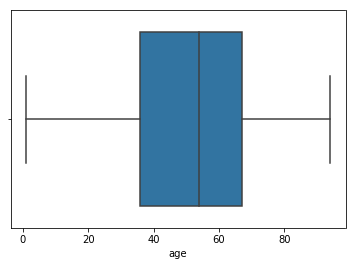

In [27]:
age_filt = data[data['age']<100]
ax = sns.boxplot(x = age_filt['age'] )
plt.savefig("age_filt.png", format='png', dpi=300)

In [30]:
data['age'] = age_filt
data['age'].dropna(inplace = True)
data['age'] = data['age'].astype('int')

In [39]:
data = data.dropna()
data.head()

,age,sex,on_thyroxine,on_antithyroid_medication,sick,pregnant,lithium,goitre,tumor,thyroid_surgery,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class
0,41.0,1,0,0,0,0,0,0,0,0,0,0,1.30,2.5,125.0,1.14,109.0,0
1,23.0,1,0,0,0,0,0,0,0,0,0,0,4.10,2.0,102.0,0.98,107.0,0
2,46.0,2,0,0,0,0,0,0,0,0,0,0,0.98,2.0,109.0,0.91,120.0,0
3,70.0,1,1,0,0,0,0,0,0,0,0,0,0.16,1.9,175.0,0.98,107.0,0
4,70.0,1,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61.0,0.87,70.0,0


In [28]:
#ax = sns.boxplot(x = df["TSH"])

In [29]:
"""
TSH_filt = df[df['TSH']< 10]
ax = sns.boxplot(x = TSH_filt['TSH'] )
plt.savefig("TSH_filt.png", format='png', dpi=300)

"""

'\nTSH_filt = df[df[\'TSH\']< 10]\nax = sns.boxplot(x = TSH_filt[\'TSH\'] )\nplt.savefig("TSH_filt.png", format=\'png\', dpi=300)\n\n'

In [30]:
"""
df['TSH'] = TSH_filt
df['TSH'].dropna(inplace = True)
df['TSH'].unique()
"""

"\ndf['TSH'] = TSH_filt\ndf['TSH'].dropna(inplace = True)\ndf['TSH'].unique()\n"

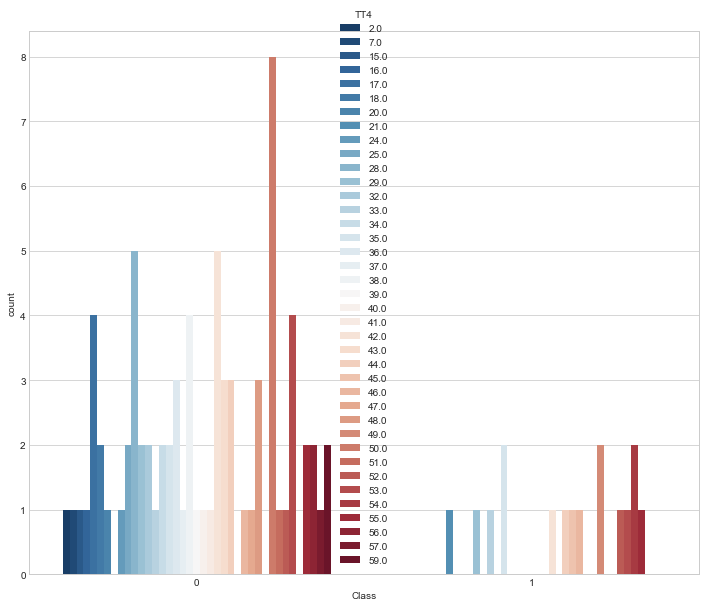

In [38]:
df['TT4'] = TT4_filt
sns.set_style('whitegrid')
plt.figure(figsize = (12,10))
sns.countplot(x = 'Class', hue = 'TT4', data = df, palette = 'RdBu_r')

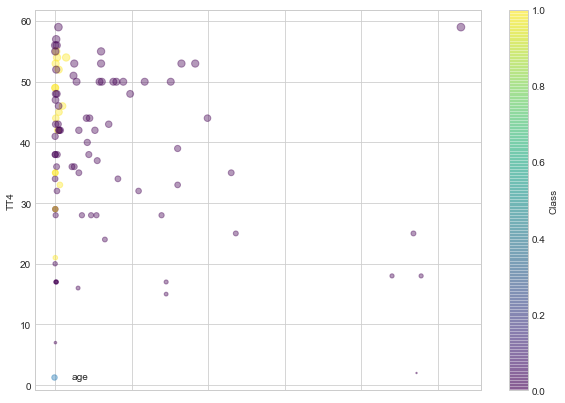

In [50]:
df.plot(kind="scatter", x="TSH", y="TT4",
    s=df['age'], label="age", 
    c="Class", cmap=plt.get_cmap("viridis"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
#plt.savefig("scatter1.png",format='png', dpi=300)
plt.show()

In [40]:
Y = data.sick

In [41]:
from sklearn.model_selection import train_test_split


In [42]:
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.3, random_state=42)

In [43]:
print(X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(2639, 18) (2639,)
(1131, 18) (1131,)


In [44]:
from xgboost import XGBClassifier

In [32]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [33]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

c:\users\abayomi\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


In [36]:
from sklearn.metrics import f1_score, precision_score, recall_score
precision = precision_score(y_test, predictions)
print("Precision: %.2f%%" % (precision * 100.0))

Precision: 100.00%


In [37]:
F1 = f1_score(y_test, predictions)
print("F1: %.2f%%" % (F1 * 100.0))

F1: 100.00%


In [121]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [61]:
auc_test = roc_auc_score(y_test, y_pred)
print('Train AUC:%.3f'%auc_test)


Train AUC:1.000


In [62]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x000000C127A68668>>
Traceback (most recent call last):
  File "c:\users\abayomi\appdata\local\programs\python\python35\lib\site-packages\xgboost\core.py", line 366, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


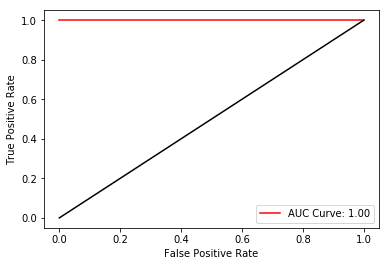

In [63]:
plt.plot(fpr, tpr,'r-', label = 'AUC Curve: %.2f'%auc_test)


plt.plot([0,1],[0,1],'-k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
plt.savefig('Area under curve.png', format = 'png', dpi = 300)

### Using decision trees

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [46]:
clf = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [49]:
y_pred2 = clf.predict(X_test)
pred2 = [round(value) for value in y_pred2]

In [50]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
precision1 = precision_score(y_test, pred2)
print("Precision: %.2f%%" % (precision1 * 100.0))

Precision: 100.00%


In [52]:
accuracy1 = accuracy_score(y_test, pred2)
print("Accuracy: %.2f%%" % (accuracy1 * 100.0))

Accuracy: 100.00%


### Using Logistic Regression

In [112]:
from sklearn import linear_model

In [113]:
lg = linear_model.LogisticRegression(C = 0.0001, penalty = 'l2', random_state = 42)


In [114]:
lg.fit(X_train, y_train)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [116]:
y_pred1 = model.predict(X_test)
pred1 = [round(value) for value in y_pred]

c:\users\abayomi\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [117]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
precision1 = precision_score(y_test, pred1)
print("Precision: %.2f%%" % (precision1 * 100.0))

Precision: 82.76%


In [118]:
accuracy1 = accuracy_score(y_test, pred1)
print("Accuracy: %.2f%%" % (accuracy1 * 100.0))

Accuracy: 98.15%


In [119]:
F1_score = f1_score(y_test, y_pred1)
print("F1: %.2f%%" % (F1_score * 100.0))

F1: 77.42%


In [120]:
recall = recall_score(y_test, pred1)
print("recall: %.2f%%" % (recall * 100.0))

recall: 72.73%


In [122]:
auc_test1 = roc_auc_score(y_test, y_pred1)
print('Train AUC:%.3f'%auc_test1)

Train AUC:1.000


In [123]:
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred1)

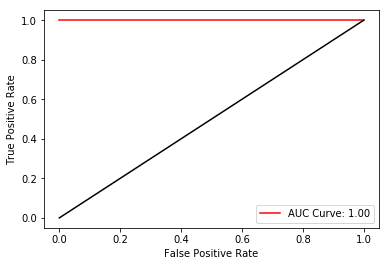

In [124]:
plt.plot(fpr1, tpr1,'r-', label = 'AUC Curve: %.2f'%auc_test1)


plt.plot([0,1],[0,1],'-k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
plt.savefig('Area under curve.png', format = 'png', dpi = 300)

In [128]:
print(y_train)

3161    0
1620    1
2370    0
2911    0
2604    0
612     0
2488    0
1864    0
2514    0
485     0
2186    0
3321    0
3286    0
258     0
386     0
2878    0
2970    0
1615    0
2709    0
803     0
209     0
3415    0
1503    0
1074    0
2537    0
2029    0
596     0
3028    0
2930    0
296     0
       ..
2325    0
955     0
1215    0
2434    0
2854    0
3486    0
1515    0
2392    0
769     0
3381    0
1685    0
130     0
3736    0
2920    0
3172    0
3445    0
2136    0
1482    0
330     0
1238    0
466     0
2170    0
1638    0
3093    0
1095    0
1130    0
1294    0
860     0
3508    0
3175    0
Name: sick, dtype: int8


[[722   0]
 [  0  33]]


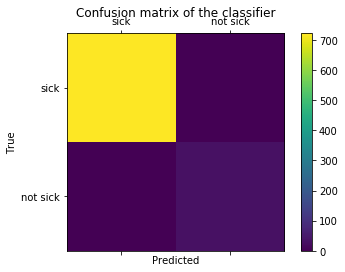

In [144]:
from sklearn.metrics import confusion_matrix
labels = ['sick', 'not sick']
cm = confusion_matrix(y_test, y_pred1)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')

fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
plt.savefig('confusion_matrix2.png', format = 'png', dpi = 300)